
**Topics**
- Name Entity Recognition
- Part of Speech Tagging
- Word Segmentation
- Sentence Segmentation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Name Entity Recongition (for English)

In [ ]:
! pip install -q simpletransformers

     |████████████████████████████████| 248 kB 15.9 MB/s 
     |████████████████████████████████| 1.7 MB 66.0 MB/s 
     |████████████████████████████████| 311 kB 74.9 MB/s 
     |████████████████████████████████| 3.5 MB 58.3 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 1.2 MB 49.3 MB/s 
     |████████████████████████████████| 6.8 MB 59.6 MB/s 
     |████████████████████████████████| 9.7 MB 51.7 MB/s 
     |████████████████████████████████| 895 kB 27.9 MB/s 
     |████████████████████████████████| 596 kB 70.7 MB/s 
     |████████████████████████████████| 67 kB 6.4 MB/s 
     |████████████████████████████████| 144 kB 69.9 MB/s 
     |████████████████████████████████| 181 kB 77.5 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 134 kB 66.0 MB/s 
     |████████████████████████████████| 243 kB 73.7 MB/s 
     |████████████████████████████████| 1.1 MB 63.7 MB/s 
     |██████████████

In [ ]:
import logging

import torch
import pandas as pd
from simpletransformers.ner import NERModel, NERArgs

## Name Entity Recognition (for Thai)

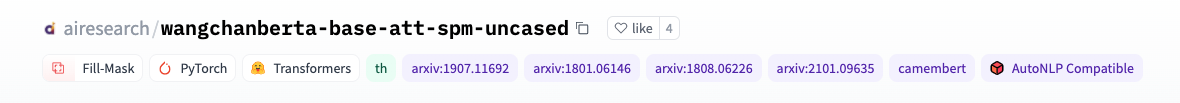

In [ ]:
! pip install -q datasets transformers[sentencepiece] simpletransformers

In [ ]:
! wget https://github.com/kobkrit/datasets/raw/main/AIFORTHAI-LST20Corpus.tar.gz

--2022-02-23 07:21:26--  https://github.com/kobkrit/datasets/raw/main/AIFORTHAI-LST20Corpus.tar.gz
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kobkrit/datasets/main/AIFORTHAI-LST20Corpus.tar.gz [following]
--2022-02-23 07:21:27--  https://raw.githubusercontent.com/kobkrit/datasets/main/AIFORTHAI-LST20Corpus.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13551362 (13M) [application/octet-stream]
Saving to: ‘AIFORTHAI-LST20Corpus.tar.gz’

AIFORTHAI-LST20Corp 100%[===================>]  12.92M  --.-KB/s    in 0.05s   

2022-02-23 07:21:28 (255 MB/s) - ‘AIFORTHAI-LST20Corpus.tar.gz’ save

In [ ]:
!ls

AIFORTHAI-LST20Corpus.tar.gz  drive  sample_data


In [ ]:
!tar -xf /content/drive/MyDrive/Machima/Hackathon#2_NLP/0_LST20-Dataset/AIFORTHAI-LST20Corpus.tar.gz

In [ ]:
! pwd

/content


In [ ]:
from datasets import load_dataset
lst20 = load_dataset("lst20", data_dir="/content/LST20_Corpus")

Downloading:   0%|          | 0.00/2.42k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

Using custom data configuration default-97621787f5b60e1b


0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset lst20 downloaded and prepared to /root/.cache/huggingface/datasets/lst20/default-97621787f5b60e1b/0.0.0/e1b2a921fb011578ab43ddbbf789f3c500d62cb2df8ae4ed4b60bae8e4c0d3ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
lst20

DatasetDict({
    train: Dataset({
        features: ['id', 'fname', 'tokens', 'pos_tags', 'ner_tags', 'clause_tags'],
        num_rows: 63310
    })
    validation: Dataset({
        features: ['id', 'fname', 'tokens', 'pos_tags', 'ner_tags', 'clause_tags'],
        num_rows: 5620
    })
    test: Dataset({
        features: ['id', 'fname', 'tokens', 'pos_tags', 'ner_tags', 'clause_tags'],
        num_rows: 5250
    })
})

In [ ]:
import pandas as pd
train_df = pd.DataFrame(lst20['train'])
validation_df = pd.DataFrame(lst20['validation'])
test_df = pd.DataFrame(lst20['test'])

In [ ]:
train_df

,id,fname,tokens,pos_tags,ner_tags,clause_tags
0,0,T00126.txt,"[สุรยุทธ์, ยัน, ปฏิเสธ, ลงนาม, _, MOU, _, กับ,...","[0, 1, 1, 1, 2, 0, 2, 4, 0, 12, 1, 0]","[8, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0]","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]"
1,1,T00126.txt,"[1, _, กันยายน, _, 2550, _, 12:21, _, น.]","[8, 2, 0, 2, 8, 2, 8, 2, 10]","[3, 13, 13, 13, 23, 0, 3, 13, 23]","[1, 2, 2, 2, 2, 2, 2, 2, 3]"
2,2,T00126.txt,"[นายก, ฯ, _, ย้ำ, ไม่, ลงนาม, ใน, _, MOU, _, ร...","[0, 2, 2, 1, 12, 1, 4, 2, 0, 2, 4, 0, 3, 5, 6,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, ..."
3,3,T00126.txt,"[ยัน, ไทย, ไม่, ได้, ล้มเหลว, ถึง, ขั้น, นั้น,...","[1, 0, 12, 5, 1, 1, 0, 9, 1, 7, 1, 0, 9, 12, 1...","[0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
4,4,T00126.txt,"[พร้อม, หนุน, กกต., จัด, เลือกตั้ง, ให้, บริสุ...","[3, 1, 0, 1, 1, 3, 1, 1]","[0, 0, 7, 0, 0, 0, 0, 0]","[1, 2, 2, 2, 3, 1, 2, 3]"
...,...,...,...,...,...,...
63305,6,T13136.txt,"[นาย, ปณิธาน, _, กล่าว, ว่า, _, หาก, การ, ยื่น...","[0, 0, 2, 1, 3, 2, 3, 7, 1, 0, 12, 1, 3, 5, 1,...","[10, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 2, 2, 2, 3, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, ..."
63306,7,T13136.txt,"[เมื่อ, ถาม, ว่า, _, ใน, ทาง, การเมือง, _, หาก...","[4, 1, 3, 2, 4, 0, 0, 2, 3, 0, 3, 1, 0, 6, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
63307,8,T13136.txt,"[นาย, ปณิธาน, _, กล่าว, ว่า, _, เรื่อง, กฎหมาย...","[0, 0, 2, 1, 3, 2, 0, 0, 5, 3, 1, 2, 7, 1, 1, ...","[10, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
63308,9,T13136.txt,"[หาก, เป็น, การ, ขอ, ถวาย, ฎีกา, ตาม, โบราณ, ร...","[3, 1, 7, 1, 1, 0, 4, 0, 0, 2, 5, 1, 0, 3, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, ..."


In [ ]:
# See tags from https://github.com/huggingface/datasets/blob/master/datasets/lst20/lst20.py
_POS_TAGS = ["NN", "VV", "PU", "CC", "PS", "AX", "AV", "FX", "NU", "AJ", "CL", "PR", "NG", "PA", "XX", "IJ"]
_NER_TAGS = [
        "O",
        "B_BRN",
        "B_DES",
        "B_DTM",
        "B_LOC",
        "B_MEA",
        "B_NUM",
        "B_ORG",
        "B_PER",
        "B_TRM",
        "B_TTL",
        "I_BRN",
        "I_DES",
        "I_DTM",
        "I_LOC",
        "I_MEA",
        "I_NUM",
        "I_ORG",
        "I_PER",
        "I_TRM",
        "I_TTL",
        "E_BRN",
        "E_DES",
        "E_DTM",
        "E_LOC",
        "E_MEA",
        "E_NUM",
        "E_ORG",
        "E_PER",
        "E_TRM",
        "E_TTL",
    ]
_CLAUSE_TAGS = ["O", "B_CLS", "I_CLS", "E_CLS"]

In [ ]:
list(map(lambda x: _NER_TAGS[x], train_df["ner_tags"][0]))

['B_PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B_ORG', 'O', 'O', 'O']

In [ ]:
def convert_to_simple_transformer_format(df, field_name, tags):
  sentence_id = []
  words = []
  labels = []

  #Limit at 1000 rows for speed.
  for (idx, r) in df.iterrows():
    # print(idx)
    for (i, t) in enumerate(r['tokens']):
      # print(i,t)
      sentence_id.append(idx)
      words.append(t)
      labels.append(tags[r[field_name][i]])

  return pd.DataFrame(
      {"sentence_id": sentence_id, "words": words, "labels": labels}
  )

## Part of Speech Tagging (in Thai)

In [ ]:
train_ = convert_to_simple_transformer_format(train_df, "pos_tags", _POS_TAGS)

In [ ]:
train_

,sentence_id,words,labels
0,0,สุรยุทธ์,NN
1,0,ยัน,VV
2,0,ปฏิเสธ,VV
3,0,ลงนาม,VV
4,0,_,PU
...,...,...,...
2714721,63309,การ,FX
2714722,63309,ถอน,VV
2714723,63309,รายชื่อ,NN
2714724,63309,ด้วย,PS


In [ ]:
validation_ = convert_to_simple_transformer_format(validation_df, "pos_tags", _POS_TAGS)
test_ = convert_to_simple_transformer_format(test_df, "pos_tags", _POS_TAGS)

In [ ]:
train_['labels'].value_counts()

NN    758019
VV    575605
PU    458562
CC    243590
PS    140047
AX    108190
AV     91290
FX     86754
NU     80495
AJ     56926
CL     49462
PR     32214
NG     27314
PA      5842
XX       247
IJ       169
Name: labels, dtype: int64

### Model

#### model

In [ ]:
# Configure the model
model_args = NERArgs()
model_args.train_batch_size = 32
model_args.evaluate_during_training = True
model_args.overwrite_output_dir = True
model_args.num_train_epochs = 1
model_args.learning_rate = 4e-5
model_args.early_stopping_patience = 5
model_args.use_early_stopping = True


model = NERModel(
    "camembert", "airesearch/wangchanberta-base-att-spm-uncased", args=model_args, 
    use_cuda=torch.cuda.is_available(), labels=_POS_TAGS
)

Downloading:   0%|          | 0.00/546 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/404M [00:00<?, ?B/s]

Some weights of the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased were not used when initializing CamembertForTokenClassification: ['lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.bias']
- This IS expected if you are initializing CamembertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForTokenClassification were not initialized from the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased and are newly initialized: ['classifier

Downloading:   0%|          | 0.00/282 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/883k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/ner/ner_model.py:379: UserWarning: use_multiprocessing automatically disabled as CamemBERT fails when using multiprocessing for feature conversion.
  "use_multiprocessing automatically disabled as CamemBERT"


In [ ]:
# Train the model
model.train_model(train_, eval_data=validation_, output_dir="/content/drive/MyDrive/PiceFolder")

  0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/125 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: VV seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: NN seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: AX seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: AV seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PU seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: N

(32,
 defaultdict(list,
             {'eval_loss': [1.1215645446777345],
              'f1_score': [0.46916610875548614],
              'global_step': [32],
              'precision': [0.5308252325043135],
              'recall': [0.4203405644973175],
              'train_loss': [1.442352056503296]}))

In [ ]:
# Make predictions with the model
predictions, raw_outputs = model.predict(["ประยุกธ์ เผย ลูกน้อง ไม่ เชื่อ พูด ตลก ได้ สามารถ แข่ง กับ โน๊ต อุดม เดี่ยว ไมโครโฟน เมื่อ วันที่ 26 กุมภาพันธ์ ที่ ตลาด หลักทรัพย์ แห่ง ประเทศไทย"])
predictions

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'ประยุกธ์': 'CC'},
  {'เผย': 'VV'},
  {'ลูกน้อง': 'NN'},
  {'ไม่': 'VV'},
  {'เชื่อ': 'VV'},
  {'พูด': 'NN'},
  {'ตลก': 'NN'},
  {'ได้': 'VV'},
  {'สามารถ': 'VV'},
  {'แข่ง': 'VV'},
  {'กับ': 'VV'},
  {'โน๊ต': 'NN'},
  {'อุดม': 'NN'},
  {'เดี่ยว': 'NN'},
  {'ไมโครโฟน': 'NN'},
  {'เมื่อ': 'CC'},
  {'วันที่': 'NN'},
  {'26': 'NN'},
  {'กุมภาพันธ์': 'NN'},
  {'ที่': 'CC'},
  {'ตลาด': 'NN'},
  {'หลักทรัพย์': 'NN'},
  {'แห่ง': 'NN'},
  {'ประเทศไทย': 'NN'}]]

In [ ]:
# Evaluate the model
result, model_outputs, preds_list = model.eval_model(test_)

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/125 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: NN seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PU seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: VV seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PS seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: AV seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: C

#### load model

In [ ]:
!unzip /content/drive/MyDrive/PiceFolder/outputs_best.zip

Archive:  /content/drive/MyDrive/PiceFolder/outputs_best.zip
   creating: outputs/best_model/
  inflating: outputs/best_model/model_args.json  
  inflating: outputs/best_model/tokenizer_config.json  
  inflating: outputs/best_model/training_args.bin  
  inflating: outputs/best_model/sentencepiece.bpe.model  
  inflating: outputs/best_model/config.json  
  inflating: outputs/best_model/optimizer.pt  
  inflating: outputs/best_model/scheduler.pt  
  inflating: outputs/best_model/eval_results.txt  
  inflating: outputs/best_model/special_tokens_map.json  
  inflating: outputs/best_model/pytorch_model.bin  


In [ ]:
model_args = NERArgs()
model_args.train_batch_size = 32
model_args.evaluate_during_training = True
model_args.overwrite_output_dir = True
model_args.num_train_epochs = 10
model_args.learning_rate = 1e-5
model_args.early_stopping_delta = 0.0001
model_args.early_stopping_patience = 5
model_args.use_early_stopping = True

In [ ]:
model = NERModel("camembert", '/content/outputs/best_model', args=model_args, use_cuda=torch.cuda.is_available(), labels=_POS_TAGS)

/usr/local/lib/python3.7/dist-packages/simpletransformers/ner/ner_model.py:379: UserWarning: use_multiprocessing automatically disabled as CamemBERT fails when using multiprocessing for feature conversion.
  "use_multiprocessing automatically disabled as CamemBERT"


### try test data

In [ ]:
f = open("/content/pos_test.txt", "r")
test_data = f.read()

In [ ]:
test_data

'อย่างไรก็ตาม\nเครื่อง\nบิน\nแอร์บัส\n\nเอ\n380\nได้\nถึง\nที่\nหมาย\nที่\nท่าอากาศยาน\nเชียงใหม่\nใน\nเวลา\n\n14.50\n\nน.\nโดย\nใช้\nเวลา\nบิน\nประมาณ\n1\nชั่วโมง\n\nมูลนิธิสืบฯ\nพอใจ\nฟื้น\nป่าห้วยขาแข้ง\nมี\nเสือโคร่ง\nมาก\nอันดับ\n2\nโลก\n\n1\n\nกันยายน\n\n2550\n17.31\nน.\n\nประธาน\nมูลนิธิ\nสืบ\nนาคะเสถียร\nพอใจ\nป่า\nห้วยขาแข้ง\nฟื้นตัว\nพบ\nเสือโคร่ง\n2-3\nตัว\nต่อ\n100\nตาราง\nกิโลเมตร\nมาก\nอันดับ\nที่\n\n2\nของ\nโลก\nตั้ง\nเป้า\n5\nปี\nขึ้น\nอันดับ\n1\nแสดง\nถึง\nยัง\nมี\nสัตว์\nและ\nพืช\nชนิด\nอื่น\nๆ\nอุดมสมบูรณ์\n\nวอน\nรัฐ\nเข้าใจ\nปรับ\nนโยบาย\nจับตา\nค้าน\nกฎหมาย\nเปิด\nป่า\n\n(\n1\nก.ย.\n)\nนาง\nรตยา\n\nจันทรเทียร\nประธาน\nมูลนิธิ\nสืบ\nนาคะเสถียร\nให้\nสัมภาษณ์\nถึง\nสถานการณ์\nป่า\nและ\nสัตว์\nป่า\nใน\nป่าห้วยขาแข้ง\nจ.\nอุทัยธานี\nว่า\nจาก\nการ\nวิจัย\nทาง\nวิชาการ\n\nล่าสุด\nพบ\nว่า\nผืน\nป่า\nห้วยขาแข้ง\nซึ่ง\nเป็น\nผืน\nป่า\nขนาด\nใหญ่\nด้าน\nตะวันตก\nเป็น\nมรดก\nทาง\nธรรมชาติ\nของ\nโลก\nพื้นที่\nแรก\nของ\nไทย\nตั้งแต่\nปี\n2534\n\nขณะ\nนี้\nมี\nเสือโคร่ง\nอาศัย\

In [ ]:
test_data = test_data.replace("\n", " ")
test_df = test_data.split(" ")
test_df

['อย่างไรก็ตาม',
 'เครื่อง',
 'บิน',
 'แอร์บัส',
 '',
 'เอ',
 '380',
 'ได้',
 'ถึง',
 'ที่',
 'หมาย',
 'ที่',
 'ท่าอากาศยาน',
 'เชียงใหม่',
 'ใน',
 'เวลา',
 '',
 '14.50',
 '',
 'น.',
 'โดย',
 'ใช้',
 'เวลา',
 'บิน',
 'ประมาณ',
 '1',
 'ชั่วโมง',
 '',
 'มูลนิธิสืบฯ',
 'พอใจ',
 'ฟื้น',
 'ป่าห้วยขาแข้ง',
 'มี',
 'เสือโคร่ง',
 'มาก',
 'อันดับ',
 '2',
 'โลก',
 '',
 '1',
 '',
 'กันยายน',
 '',
 '2550',
 '17.31',
 'น.',
 '',
 'ประธาน',
 'มูลนิธิ',
 'สืบ',
 'นาคะเสถียร',
 'พอใจ',
 'ป่า',
 'ห้วยขาแข้ง',
 'ฟื้นตัว',
 'พบ',
 'เสือโคร่ง',
 '2-3',
 'ตัว',
 'ต่อ',
 '100',
 'ตาราง',
 'กิโลเมตร',
 'มาก',
 'อันดับ',
 'ที่',
 '',
 '2',
 'ของ',
 'โลก',
 'ตั้ง',
 'เป้า',
 '5',
 'ปี',
 'ขึ้น',
 'อันดับ',
 '1',
 'แสดง',
 'ถึง',
 'ยัง',
 'มี',
 'สัตว์',
 'และ',
 'พืช',
 'ชนิด',
 'อื่น',
 'ๆ',
 'อุดมสมบูรณ์',
 '',
 'วอน',
 'รัฐ',
 'เข้าใจ',
 'ปรับ',
 'นโยบาย',
 'จับตา',
 'ค้าน',
 'กฎหมาย',
 'เปิด',
 'ป่า',
 '',
 '(',
 '1',
 'ก.ย.',
 ')',
 'นาง',
 'รตยา',
 '',
 'จันทรเทียร',
 'ประธาน',
 'มูลนิธิ',
 'สืบ',
 'นาคะ

In [ ]:
len(test_df)

103915

In [ ]:
print(test_df[:10])

['อย่างไรก็ตาม', 'เครื่อง', 'บิน', 'แอร์บัส', '', 'เอ', '380', 'ได้', 'ถึง', 'ที่']


In [ ]:
for i in range(len(test_df)):
  if test_df[i] == "":
    test_df[i] = " "

In [ ]:
type(test_df)

list

In [ ]:
df = pd.DataFrame(data=test_df, columns=["word"])
df

,word
0,อย่างไรก็ตาม
1,เครื่อง
2,บิน
3,แอร์บัส
4,
...,...
103910,รับ
103911,การ
103912,โจมตี
103913,


### check time

In [ ]:
%%time 
p, r = model.predict(test_df[0:60])
p

  0%|          | 0/60 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/8 [00:00<?, ?it/s]

CPU times: user 391 ms, sys: 9 ms, total: 400 ms
Wall time: 415 ms


### save model

In [ ]:
! zip -r outputs_best.zip outputs/best_model/

# try sub-sentence

In [ ]:
!pip install pythainlp==2.2.6

In [ ]:
from pythainlp.tokenize import clause_tokenize
sen = clause_tokenize(test_df[:60])
sen

In [ ]:
pred_sen = []
for i in sen:
    pred, raw = model.predict(i) # predict ทีละประโยค
    pred_sen.append(pred)

  0%|          | 0/20 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
len(pred_sen)

2

In [ ]:
pred_sen

[[[{'อย่างไรก็ตาม': 'CC'}],
  [{'เครื่อง': 'NN'}],
  [{'บิน': 'VV'}],
  [{'แอร์บัส': 'NN'}],
  [],
  [{'เอ': 'NN'}],
  [{'380': 'NU'}],
  [{'ได้': 'AX'}],
  [{'ถึง': 'PS'}],
  [{'ที่': 'CC'}],
  [{'หมาย': 'NN'}],
  [{'ที่': 'CC'}],
  [{'ท่าอากาศยาน': 'NN'}],
  [{'เชียงใหม่': 'NN'}],
  [{'ใน': 'PS'}],
  [{'เวลา': 'NN'}],
  [],
  [{'14.50': 'NU'}],
  [],
  [{'น.': 'NN'}]],
 [[{'โดย': 'CC'}],
  [{'ใช้': 'VV'}],
  [{'เวลา': 'NN'}],
  [{'บิน': 'VV'}],
  [{'ประมาณ': 'AJ'}],
  [{'1': 'NU'}],
  [{'ชั่วโมง': 'CL'}],
  [],
  [{'มูลนิธิสืบฯ': 'NN'}],
  [{'พอใจ': 'VV'}],
  [{'ฟื้น': 'VV'}],
  [{'ป่าห้วยขาแข้ง': 'NN'}],
  [{'มี': 'VV'}],
  [{'เสือโคร่ง': 'NN'}],
  [{'มาก': 'VV'}],
  [{'อันดับ': 'NN'}],
  [{'2': 'NU'}],
  [{'โลก': 'NN'}],
  [],
  [{'1': 'NU'}],
  [],
  [{'กันยายน': 'NN'}],
  [],
  [{'2550': 'NU'}],
  [{'17.31': 'NU'}],
  [{'น.': 'NN'}],
  [],
  [{'ประธาน': 'NN'}],
  [{'มูลนิธิ': 'NN'}],
  [{'สืบ': 'VV'}],
  [{'นาคะเสถียร': 'NN'}],
  [{'พอใจ': 'VV'}],
  [{'ป่า': 'NN'}],
  [{'ห้วยขาแข

In [ ]:
sub_sentence_list = []
for i in range(len(pred_sen)):
    for j in range(len(pred_sen[i])):
        sub_sentence_list.append(pred_sen[i][j][0])

In [ ]:
sub_sentence_list

In [ ]:
def predict_sub_sentence(word_50): # word_50 = list ที่เก็บ word ไว้ 50 คำ
  from pythainlp.tokenize import clause_tokenize
  sen = clause_tokenize(word_50)

  pred_sen = []
  for i in sen:
    pred, raw = model.predict(i) # predict ทีละประโยค
    pred_sen.append(pred)
  
  sub_sentence_list = []
  for i in range(len(pred_sen)):
    for j in range(len(pred_sen[i])):
      sub_sentence_list.append(pred_sen[i][j][0])
  return sub_sentence_list # return [{'a':'NN}, {}, {}, ...]

### ใส่ทีละ 50 คำ

In [ ]:
def convert_to_key_value_from(dic):
  if (dic == None):
    return "PU"
  else:
    dic = list(dic.items())[0]
    return dic[0] + "_" + dic[1]

def dic_to_tuple_to_string(x):
  t = list(x.items())[0]
  return t[0] + "_" + t[1]


def predict_sen_final(test): #test คือ array ที่เก็บ word แต่ละคำ (เอา 50 คำ)
  test_50 = pd.DataFrame(data=test, columns=['word'])
  index_no_space = test_50[test_50['word'] != " "].index
  index_space = test_50[test_50['word'] == " "].index

  word = []
  for i in index_no_space:
    word.append(test_50.loc[i]['word'])
  pred_sub_sen = predict_sub_sentence(word)

  pred = []
  for i in range(len(pred_sub_sen)):
    a = pred_sub_sen[i]
    pred.append(dic_to_tuple_to_string(a))

  a = pd.DataFrame(pred)
  a.rename({0:'word'}, axis=1, inplace=True)
  a['Id'] = a['word'].apply(lambda x:x.split("_")[0])
  a['Predicted'] = a['word'].apply(lambda x:x.split("_")[-1])
  a.drop(columns=['word'], axis=1, inplace=True)
  a['index'] = index_no_space
  
  for i in range(len(index_space)):
    df2 = {'Id': " ", 'Predicted': 'PU', 'index': index_space[i]}
    a = a.append(df2, ignore_index = True)

  a.set_index("index", inplace=True)
  a.sort_index(axis=0, inplace=True)
  
  return a

In [ ]:
len(test_df) // 50

2078

In [ ]:
df_final_1 = pd.DataFrame()
df_final_2 = pd.DataFrame()
df_final_3 = pd.DataFrame()
df_final_4 = pd.DataFrame()
df_final_5 = pd.DataFrame()
df_final_6 = pd.DataFrame()
df_final_7 = pd.DataFrame()
df_final_8 = pd.DataFrame()
df_final_9 = pd.DataFrame()
df_final_10 = pd.DataFrame()

In [ ]:
df_final_11 = pd.DataFrame()
df_final_12 = pd.DataFrame()
df_final_13 = pd.DataFrame()
df_final_14 = pd.DataFrame()
df_final_15 = pd.DataFrame()
df_final_16 = pd.DataFrame()
df_final_17 = pd.DataFrame()
df_final_18 = pd.DataFrame()
df_final_19 = pd.DataFrame()
df_final_20 = pd.DataFrame()

In [ ]:
df_final_21 = pd.DataFrame()
df_final_22 = pd.DataFrame()
df_final_23 = pd.DataFrame()
df_final_24 = pd.DataFrame()
df_final_25 = pd.DataFrame()
df_final_26 = pd.DataFrame()
df_final_27 = pd.DataFrame()
df_final_28 = pd.DataFrame()
df_final_29 = pd.DataFrame()
df_final_30 = pd.DataFrame()

In [ ]:
df_final_31 = pd.DataFrame()
df_final_32 = pd.DataFrame()
df_final_33 = pd.DataFrame()
df_final_34 = pd.DataFrame()
df_final_35 = pd.DataFrame()
df_final_36 = pd.DataFrame()
df_final_37 = pd.DataFrame()
df_final_38 = pd.DataFrame()
df_final_39 = pd.DataFrame()
df_final_40 = pd.DataFrame()

In [ ]:
df_final_41 = pd.DataFrame()
df_final_42 = pd.DataFrame()

In [ ]:
len(test_df)

103915

In [ ]:
start = 102500
end = 102550

In [ ]:
for i in range(0, 28):
  if i == 27:
    df1 = predict_sen_final(test_df[start:103915])
  else:
    df1 = predict_sen_final(test_df[start:end])
  df_final_42 = df_final_42.append(df1, ignore_index = True)
  start = start + 50
  end = end + 50

In [ ]:
df_final_42

,Id,Predicted
0,ภูเก็ต,NN
1,,PU
2,และ,CC
3,ขยาย,VV
4,ผล,NN
...,...,...
1410,รับ,VV
1411,การ,FX
1412,โจมตี,VV
1413,,PU


In [ ]:
df_final_42.to_csv("df_42.csv")

### Concat all dataframe

In [ ]:
def readCsv(path):
  df = pd.read_csv(path)
  df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
  return df

df1 = readCsv("/content/df_1_2500.csv")
df2 = readCsv("/content/df_2_5000.csv")
df3 = readCsv("/content/df_3_7500.csv")
df4 = readCsv("/content/df_4_10000.csv")
df5 = readCsv("/content/df_5_12500.csv")
df6 = readCsv("/content/df_6_15000.csv")
df7 = readCsv("/content/df_7_17500.csv")
df8 = readCsv("/content/df_8_20000.csv")
df9 = readCsv("/content/df_9_22500.csv")
df10 = readCsv("/content/df_10_25000.csv")
df11 = readCsv("/content/df_11_27500.csv")
df12 = readCsv("/content/df_12_30000.csv")
df13 = readCsv("/content/df_13_32500.csv")
df14 = readCsv("/content/df_14_35000.csv")
df15 = readCsv("/content/df_15_37500.csv")
df16 = readCsv("/content/df_16_40000.csv")
df17 = readCsv("/content/df_17_42500.csv")
df18 = readCsv("/content/df_18_45000.csv")
df19 = readCsv("/content/df_19_47500.csv")
df20 = readCsv("/content/df_20_50000.csv")
df21 = readCsv("/content/df_21_52500.csv")
df22 = readCsv("/content/df_22_55000.csv")
df23 = readCsv("/content/df_23_57500.csv")
df24 = readCsv("/content/df_24_60000.csv")
df25 = readCsv("/content/df_25_62500.csv")
df26 = readCsv("/content/df_26.csv")
df27 = readCsv("/content/df_27.csv")
df28 = readCsv("/content/df_28.csv")
df29 = readCsv("/content/df_29.csv")
df30 = readCsv("/content/df_30.csv")
df31 = readCsv("/content/df_31.csv")
df32 = readCsv("/content/df_32.csv")
df33 = readCsv("/content/df_33.csv")
df34 = readCsv("/content/df_34.csv")
df35 = readCsv("/content/df_35.csv")
df36 = readCsv("/content/df_36.csv")
df37 = readCsv("/content/df_37.csv")
df38 = readCsv("/content/df_38.csv")
df39 = readCsv("/content/df_39.csv")
df40 = readCsv("/content/df_40.csv")
df41 = readCsv("/content/df_41.csv")
df42 = readCsv("/content/df_42.csv")

In [ ]:
df_final = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,
                      df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,
                      df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,
                      df31,df32,df33,df34,df35,df36,df37,df38,df39,df40,df41,df42], axis=0)
df_final

,Id,Predicted
0,อย่างไรก็ตาม,CC
1,เครื่อง,NN
2,บิน,VV
3,แอร์บัส,NN
4,,PU
...,...,...
1410,รับ,VV
1411,การ,FX
1412,โจมตี,VV
1413,,PU


In [ ]:
#df_final.drop(columns=["Id"], axis=1, inplace=True)
df_final.reset_index(drop=True, inplace=True)
# df_final.set_index("Id", inplace=True)
df_final

,Id,Predicted
0,อย่างไรก็ตาม,CC
1,เครื่อง,NN
2,บิน,VV
3,แอร์บัส,NN
4,,PU
...,...,...
103910,รับ,VV
103911,การ,FX
103912,โจมตี,VV
103913,,PU


In [ ]:
df

,word
0,อย่างไรก็ตาม
1,เครื่อง
2,บิน
3,แอร์บัส
4,
...,...
103910,รับ
103911,การ
103912,โจมตี
103913,


In [ ]:
df_check = pd.concat([df, df_final], axis=1)
df_check

,word,Id,Predicted
0,อย่างไรก็ตาม,อย่างไรก็ตาม,CC
1,เครื่อง,เครื่อง,NN
2,บิน,บิน,VV
3,แอร์บัส,แอร์บัส,NN
4,,,PU
...,...,...,...
103910,รับ,รับ,VV
103911,การ,การ,FX
103912,โจมตี,โจมตี,VV
103913,,,PU


In [ ]:
import numpy as np
comparison_column = np.where(df_check["word"] == df_check["Id"], True, False)
df_check["equal"] = comparison_column
df_check

,word,Id,Predicted,equal
0,อย่างไรก็ตาม,อย่างไรก็ตาม,CC,True
1,เครื่อง,เครื่อง,NN,True
2,บิน,บิน,VV,True
3,แอร์บัส,แอร์บัส,NN,True
4,,,PU,True
...,...,...,...,...
103910,รับ,รับ,VV,True
103911,การ,การ,FX,True
103912,โจมตี,โจมตี,VV,True
103913,,,PU,True


In [ ]:
df_check.to_csv("df_check_word.csv")

In [ ]:
df

In [ ]:
df_check[df_check['equal'] == False]

,word,Id,Predicted,equal
4659,อนุ_กมธ.,อนุ,NN,False
5434,ร้อย_ลว.ก.,ร้อย,NU,False
5466,ร้อย_ลว._ไกล,ร้อย,NU,False
5614,กิ่ง_อ.,กิ่ง,NN,False
5692,กิ่ง_อ.,กิ่ง,NN,False
...,...,...,...,...
97431,ตำรวจสืบสวนภูธรภาค_5,ตำรวจสืบสวนภูธรภาค,NN,False
97518,ตำรวจภูธรภาค_5,ตำรวจภูธรภาค,NN,False
98230,วอชิงตัน_ดี.ซี.,วอชิงตัน,NN,False
99421,จี_8,จี,NN,False


In [ ]:
df_final.to_csv("wangchan-10-epochs-1e-5-sub-sentence.csv", index=False)

In [ ]:
df_final

,Predicted
0,CC
1,NN
2,VV
3,NN
4,PU
...,...
103910,VV
103911,FX
103912,VV
103913,PU


In [ ]:
1400/50

28.0

In [ ]:
len(test_df)

103915

In [ ]:
df1 = predict_sen_final(test_df[:50])
df2 = predict_sen_final(test_df[50:100])

  0%|          | 0/17 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
df1.append(df2, ignore_index = True)

,Id,Predicted
0,อย่างไรก็ตาม,CC
1,เครื่อง,NN
2,บิน,VV
3,แอร์บัส,NN
4,,PU
...,...,...
95,ค้าน,VV
96,กฎหมาย,NN
97,เปิด,VV
98,ป่า,NN


In [ ]:
len(test_df) // 50

2078

# Try word-sliding 60 words

In [ ]:
def dic_to_tuple_to_string(x):
  if x == []:
    return " _" + "PU"
  else:
    t = list(x[0].items())[0]
    return t[0] + "_" + t[-1]



# pred = []
# for i in range(len(pred_sub_sen)):
#   a = pred_sub_sen[i]
#   pred.append(dic_to_tuple_to_string(a))

# a = pd.DataFrame(pred)
# a.rename({0:'word'}, axis=1, inplace=True)
# a['Id'] = a['word'].apply(lambda x:x.split("_")[0])
# a['Predicted'] = a['word'].apply(lambda x:x.split("_")[-1])
# a.drop(columns=['word'], axis=1, inplace=True)
# a['index'] = index_no_space


In [ ]:
len(test_df)

103915

In [ ]:
len(test_df) / 20

5195.75

In [ ]:
(len(test_df) // 60) + 1

1732

In [ ]:
from tqdm import tqdm

loop = (len(test_df) // 60) + 1 # 1732

start = 0
end = 60

result = []

for i in tqdm(range(5000)):
  if (end <= 103860):
    if i == 0:
      predictions, raw_output = model.predict(test_df[start:end])
      predictions = predictions[:20]
      for i in predictions:
        result.append(dic_to_tuple_to_string(i))
    else:
      predictions, raw_output = model.predict(test_df[start:end])
      predictions = predictions[20:40]
      for i in predictions:
        result.append(dic_to_tuple_to_string(i))
      start = start + 20
      end = end + 20
  else:
    break

Running Prediction:   0%|          | 0/8 [00:00<?, ?it/s]

100%|█████████▉| 4988/5000 [36:56<00:05,  2.26it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/8 [00:00<?, ?it/s]

100%|█████████▉| 4989/5000 [36:59<00:14,  1.35s/it]

  0%|          | 0/60 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/8 [00:00<?, ?it/s]

100%|█████████▉| 4990/5000 [37:00<00:10,  1.08s/it]

  0%|          | 0/60 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/8 [00:00<?, ?it/s]

100%|█████████▉| 4991/5000 [37:00<00:07,  1.13it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/8 [00:00<?, ?it/s]

100%|█████████▉| 4992/5000 [37:01<00:06,  1.33it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/8 [00:00<?, ?it/s]

100%|█████████▉| 4993/5000 [37:01<00:04,  1.52it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/8 [00:00<?, ?it/s]

100%|█████████▉| 4994/5000 [37:02<00:03,  1.68it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/8 [00:00<?, ?it/s]

100%|█████████▉| 4995/5000 [37:02<00:02,  1.83it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/8 [00:00<?, ?it/s]

100%|█████████▉| 4996/5000 [37:02<00:02,  1.96it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/8 [00:00<?, ?it/s]

100%|█████████▉| 4997/5000 [37:03<00:01,  2.03it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/8 [00:00<?, ?it/s]

100%|█████████▉| 4998/5000 [37:03<00:00,  2.08it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/8 [00:00<?, ?it/s]

100%|█████████▉| 4999/5000 [37:04<00:00,  2.14it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [37:04<00:00,  2.25it/s]


In [ ]:
%%time
pp, r = model.predict(test_df[0:60])
pp

  0%|          | 0/60 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/8 [00:00<?, ?it/s]

CPU times: user 397 ms, sys: 12.9 ms, total: 410 ms
Wall time: 566 ms


[[{'อย่างไรก็ตาม': 'CC'}],
 [{'เครื่อง': 'NN'}],
 [{'บิน': 'VV'}],
 [{'แอร์บัส': 'NN'}],
 [],
 [{'เอ': 'NN'}],
 [{'380': 'NU'}],
 [{'ได้': 'AX'}],
 [{'ถึง': 'PS'}],
 [{'ที่': 'CC'}],
 [{'หมาย': 'NN'}],
 [{'ที่': 'CC'}],
 [{'ท่าอากาศยาน': 'NN'}],
 [{'เชียงใหม่': 'NN'}],
 [{'ใน': 'PS'}],
 [{'เวลา': 'NN'}],
 [],
 [{'14.50': 'NU'}],
 [],
 [{'น.': 'NN'}],
 [{'โดย': 'CC'}],
 [{'ใช้': 'VV'}],
 [{'เวลา': 'NN'}],
 [{'บิน': 'VV'}],
 [{'ประมาณ': 'AJ'}],
 [{'1': 'NU'}],
 [{'ชั่วโมง': 'CL'}],
 [],
 [{'มูลนิธิสืบฯ': 'NN'}],
 [{'พอใจ': 'VV'}],
 [{'ฟื้น': 'VV'}],
 [{'ป่าห้วยขาแข้ง': 'NN'}],
 [{'มี': 'VV'}],
 [{'เสือโคร่ง': 'NN'}],
 [{'มาก': 'VV'}],
 [{'อันดับ': 'NN'}],
 [{'2': 'NU'}],
 [{'โลก': 'NN'}],
 [],
 [{'1': 'NU'}],
 [],
 [{'กันยายน': 'NN'}],
 [],
 [{'2550': 'NU'}],
 [{'17.31': 'NU'}],
 [{'น.': 'NN'}],
 [],
 [{'ประธาน': 'NN'}],
 [{'มูลนิธิ': 'NN'}],
 [{'สืบ': 'VV'}],
 [{'นาคะเสถียร': 'NN'}],
 [{'พอใจ': 'VV'}],
 [{'ป่า': 'NN'}],
 [{'ห้วยขาแข้ง': 'NN'}],
 [{'ฟื้นตัว': 'VV'}],
 [{'พบ': 'VV'}],
 [{

In [ ]:
for i in p:
  result.append(dic_to_tuple_to_string(i))

In [ ]:
len(result)

103915

In [ ]:
df_slicing_60_pos_only = pd.DataFrame(data=result)
df_slicing_60_pos_only.rename({0:"value"}, axis=1, inplace=True)
df_slicing_60_pos_only

,value
0,อย่างไรก็ตาม_CC
1,เครื่อง_NN
2,บิน_VV
3,แอร์บัส_NN
4,_PU
...,...
103910,รับ_VV
103911,การ_FX
103912,โจมตี_VV
103913,_PU


In [ ]:
words = list(df_slicing_60_pos_only['value'].apply(lambda x:x.split("_")[0]).values)
pos = list(df_slicing_60_pos_only['value'].apply(lambda x:x.split("_")[1]).values)

In [ ]:
df_submission = pd.DataFrame(data=words, columns=['word'])
df_submission['Predicted'] = pos
df_submission.drop("word", axis=1, inplace=True)
df_submission.reset_index(inplace=True)
df_submission['index'] = df_submission['index'].apply(lambda x:x+1)
df_submission.set_index("index", inplace=True)
df_submission

,Predicted
index,
1,CC
2,NN
3,VV
4,NN
5,PU
...,...
103911,VV
103912,FX
103913,VV


In [ ]:
df_submission.to_csv("wangchan_10-epochs-slicing-60.csv")

In [ ]:
pred_list = []
for i in predictions:
  pred_list.append(dic_to_tuple_to_string(i))
pred_list

['โดย_CC',
 'ใช้_VV',
 'เวลา_NN',
 'บิน_VV',
 'ประมาณ_AJ',
 '1_NU',
 'ชั่วโมง_CL',
 ' _PU',
 'มูลนิธิสืบฯ_NN',
 'พอใจ_VV',
 'ฟื้น_VV',
 'ป่าห้วยขาแข้ง_NN',
 'มี_VV',
 'เสือโคร่ง_NN',
 'มาก_VV',
 'อันดับ_NN',
 '2_NU',
 'โลก_NN',
 ' _PU',
 '1_NU']